<a href="https://colab.research.google.com/github/Bosy-Ayman/Machine_Learning/blob/main/Assignment(3)_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np

In [10]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)/np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias
    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [11]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [33]:
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))

    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [32]:
def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [25]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [16]:
!pip install keras

In [26]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

In [34]:

network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),

]

epochs = 40
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        output = x
        for layer in network:
            output = layer.forward(output)

        error += mse(y_true, output)

        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)

    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/40, error=0.047970
2/40, error=0.024721
3/40, error=0.018140
4/40, error=0.014390
5/40, error=0.011754
6/40, error=0.009813
7/40, error=0.008336
8/40, error=0.007176
9/40, error=0.006260
10/40, error=0.005487
11/40, error=0.004852
12/40, error=0.004297
13/40, error=0.003833
14/40, error=0.003451
15/40, error=0.003084
16/40, error=0.002803
17/40, error=0.002543
18/40, error=0.002315
19/40, error=0.002121
20/40, error=0.001953
21/40, error=0.001803
22/40, error=0.001677
23/40, error=0.001558
24/40, error=0.001449
25/40, error=0.001365
26/40, error=0.001275
27/40, error=0.001199
28/40, error=0.001126
29/40, error=0.001061
30/40, error=0.001004
31/40, error=0.000949
32/40, error=0.000895
33/40, error=0.000847
34/40, error=0.000803
35/40, error=0.000764
36/40, error=0.000728
37/40, error=0.000692
38/40, error=0.000660
39/40, error=0.000632
40/40, error=0.000603


In [36]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

correct_predictions = 0
total_mse = 0

for x, y in zip(x_test, y_test):
    predicted_output = predict(network, x)
    if np.argmax(y) == np.argmax(predicted_output):
        correct_predictions += 1
    total_mse += mse(y, predicted_output)

ratio = correct_predictions / len(x_test)
error = total_mse / len(x_test)

print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.89
mse: 0.0262


In [37]:
def test_model(network, x_test, y_test):
    correct_predictions = 0
    total_samples = len(x_test)
    confusion_matrix = np.zeros((10, 10), dtype=int)

    for i in range(total_samples):
        input_data = x_test[i]
        true_label = np.argmax(y_test[i])


        predicted_output = predict(network, input_data)
        predicted_label = np.argmax(predicted_output)

        confusion_matrix[true_label][predicted_label] += 1

        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy, confusion_matrix

accuracy, confusion_matrix = test_model(network, x_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy: 88.94%
Confusion Matrix:
[[ 937    0    8    1    3    6    4    6    4   11]
 [   0 1112    3    2    0    0    4    2   12    0]
 [   7    3  919    5   11    2   13   23   43    6]
 [  10    3   33  802    2   66    3   30   48   13]
 [   3    2    7    3  821    0   21   14   17   94]
 [  19    2    4   15   14  744   15   21   40   18]
 [  12    3   11    1    7   11  877    4   27    5]
 [   2    7   25    2    5    1    2  965    2   17]
 [  10    3    8    9   15   10   11   20  865   23]
 [   6    5    8    6   27   12    1   76   16  852]]


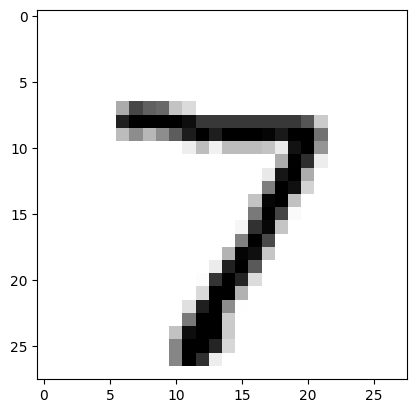

pred: 7, prob: 1.30, true: 7


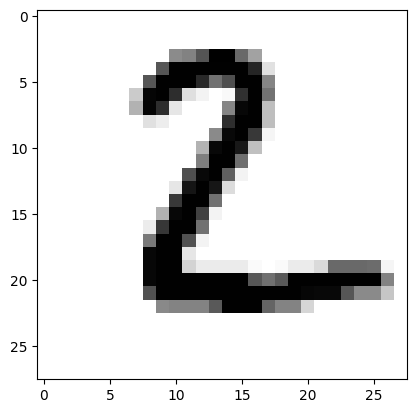

pred: 2, prob: 0.35, true: 2


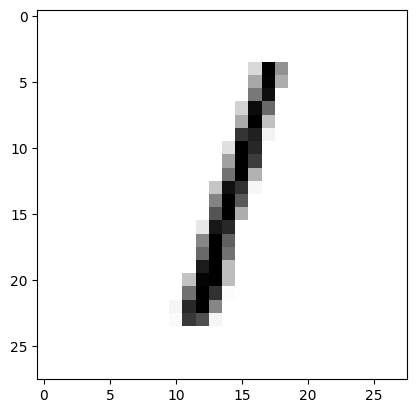

pred: 1, prob: 1.12, true: 1


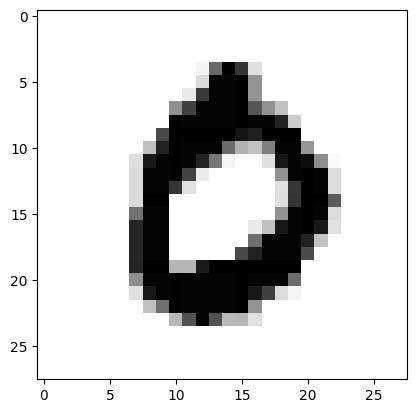

pred: 0, prob: 0.85, true: 0


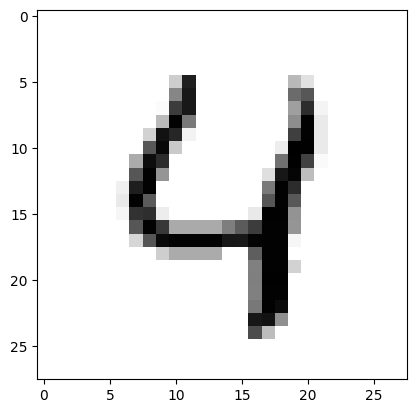

pred: 4, prob: 0.89, true: 4


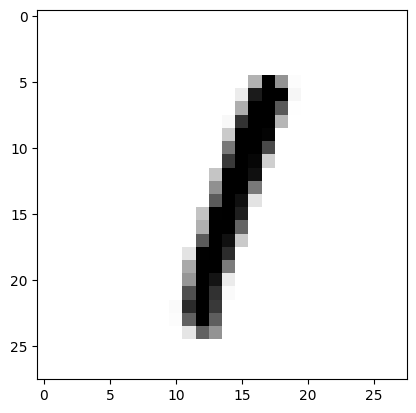

pred: 1, prob: 1.17, true: 1


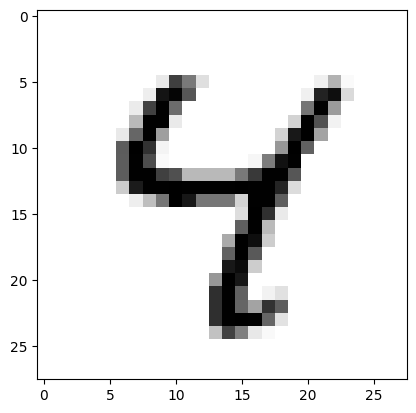

pred: 4, prob: 1.02, true: 4


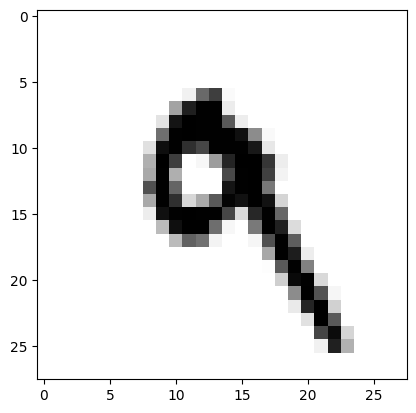

pred: 9, prob: 0.61, true: 9


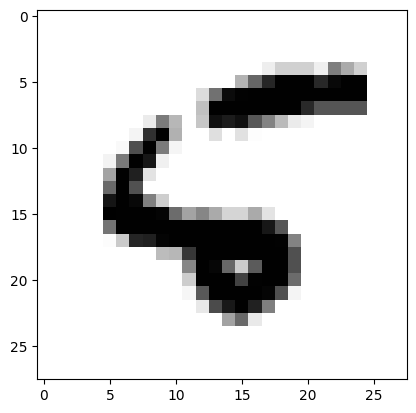

pred: 2, prob: 0.54, true: 5


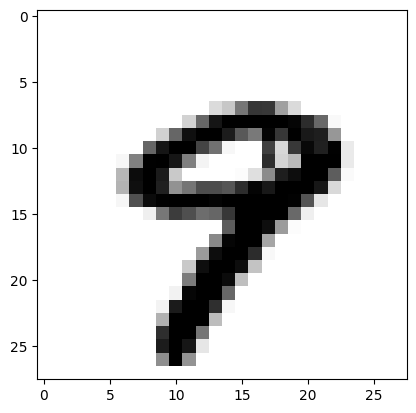

pred: 9, prob: 0.74, true: 9


In [38]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))